# Hotte (2001) Conflict and natural resources

This presents a simplified adaptation of Hotte (2001, 2013) 

```
Hotte, Louis. 2013. “Environmental Conflict and Natural Resources.” Reference Module in Earth Systems and Environmental Sciences from Encyclopedia of Energy, Natural Resource, and Environmental Economics, no. 3: 261–270.

Hotte, Louis. 2001. “Conflicts over Property Rights and Natural-Resource Exploitation at the Frontier.” Journal of Development Economics 66 (1): 1–21.  
```


Note: This was written as a jupyter notebook with embedded text and python code.  To modify or interact with content below go to the [code section](#codesection) first. On a server you can also view this as a slideshow by pressing Alt-R.

- Most economic analyses study goods acquired via *production* or *exchange*. 

- 'Make or Buy' question at the center Coase's (1937) paper on boundaries of firm. 

- Modern theory of contracts and organizations also emphasizes voluntary 'exchange' part by including participation constraints that allow either party to withdraw before entering a situation that they expect would make them worse off. 

- Forceful **appropriation** has been ignored as a third important option. Yet fear of appropriation by others lies at heart of 'property rights insecurity.' 

**Appropriation** occurs when these two conditions both hold:
- the control over a good or asset is transferred between the parties, and
- at least one of the parties would not accept the transfer if it they were free to do so. 

### Hotte (2013)

Player A (first-mover, incumbent) arrives at a frontier territory and can choose to exploit the resource sustainably to extract $y_s$ or to strip mine the resource and extract $p \cdot y_m>p \cdot y_s$. Where $p$ is the resource price.

The game starts in period 0.  In a world of perfectly and costlessly enforced property rights sustainable use from period 1 onward would yield $y_s$ that period and then $py_s$ in perpetuity thereafter. Measured in units of period 1:

$$V_1^s = \left (1 +\frac{1}{r} \right ) \cdot p y_s$$

While mining may generate a short-term windfall, We assume that in a world of costlessly and perfectly enforced property rights sustainable use is more valuable than land mining:

$$p \cdot y_s \lt p \cdot y_m \lt \frac{V_1^s}{1+r}$$

In the second period Player B (the challenger) arrives and both players make simultaneous defensive and incursive investments, respectively.

**Contest  success function (CSF)**
$$\pi(x_A, x_B) = \frac{x_A}{x_A+x_B}$$

Defines the probability that player $A$ will win the contest.

![Hotte Game](media\Hotte_game.png)

Sustainable use:

$$V_A^s=p \cdot y_s +\pi(x_A, x_B)\frac{V_1^s}{1+r}-x_A$$

$$V_B^s= (1-\pi(x_A, x_B))\frac{V_1^s}{1+r}-x_B$$

If player $A$ opts to *mine* the land the payoffs are:

$$V_A^m=p \cdot y_m$$

$$V_B^m= 0$$

where $y_m>y_s$

We can derive player $A$'s best-response or reaction function: 

$$\frac{\delta V_A^s}{\delta x_A}=\frac{\delta \pi(x_A,x_B)}{\delta x_A}\frac{V_1^s}{1+r}-1=0$$

rearranging:

$$\frac{x_B}{(x_A+x_B)^2}\frac{V_1^s}{1+r}=1$$

We finally solve for:

$$x_A(x_B) = \sqrt{\frac{x_B \cdot V_1^s}{1+r}} -x_B$$

The challenger's reaction function is symmetric to that:

$$x_B(x_A) = \sqrt{\frac{x_A \cdot V_1^s}{1+r}} -x_A$$

**Nash equilibrium level of appropriation**:

$$x_A^e=x_B^e=\frac{V_1^s}{4(1+r)}$$

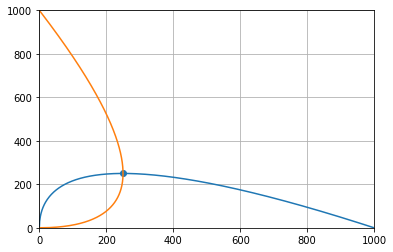

In [10]:
contest_plot(p=0.8, ys=100, r=0.08)

This interactive visualization works only if running on a jupyter server.

In [11]:
interact(contest_plot, p=(0.5,1,0.1), ys=(50,150,10), r=(0.02,0.5,0.02));

interactive(children=(FloatSlider(value=1.0, description='p', max=1.0, min=0.5), IntSlider(value=130, description='ys', max=150, min=50, step=10), FloatSlider(value=0.1, description='r', max=0.5, min=0.02, step=0.02), Output()), _dom_classes=('widget-interact',))

**Conflict intensity:**:

$$x_A^e + x_B^e=\frac{V_1^s}{2(1+r)}$$

In the predicted equilibrium the resources expended on appropriative activities are worth $\frac{1}{2}$ the present value of the prize being sought.

Inserting $x_A^e$ and $x_B^e$ into (either) player's value function:

$$V_A^{se} = \left ( 1 +\frac{1}{4r} \right ) \cdot p \cdot y_s$$

Compared to potential social benefit  $( 1 +1/r) \cdot p \cdot y_s$, the presence of conflict deducts $(3/4r)py_s$ from the value of sustainable use. 

- reduction in probability of receiving resource stream from 1 to $\frac{1}{2}$
- the addition of appropriation costs $\frac{V_1^s}{2(1+r)}$

<a id='codesection'></a>
## Code section

Run the code below first. Then return and run the code cells above.

This is where the python code (and possibly some unfinished explorations) are kept.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
%matplotlib inline

In [2]:
P = 1.0
YS = 130
YM = 150
R  = 0.1

In [3]:
def xa_r(xb, p=P, ys=YS, r = R):
    V1s = (1+1/r)*p*ys
    return (xb*V1s/(1+r))**(1/2) - xb

def xb_r(xa, p=P, ys=YS, r = R):
    V1s = (1+1/r)*p*ys
    return (xa*V1s/(1+r))**(1/2) - xa

def xnash(p=P, ys=YS, r=R):
    V1s = (1+1/r)*p*ys
    return V1s/(4*(1+r))

def pr(xa,xb):
    return xa/(xa+xb)

def vA(p=P, ys=YS, ym=YM, r=R):
    V1s = (1+1/r)*p*ys
    xn = xnash(p,ys,r)
    return p*ys +  pr(xn,xn)* V1s/(1+r) - xnash(p,ys,r), p*ym, 2*xn

In [4]:
xxb = np.linspace(0,1000,1000)

In [5]:
def contest_plot(p=P, ys=YS, r = R):
    plt.grid()
    plt.scatter(xnash(p,ys,r), xnash(p,ys,r))
    plt.axes().set_aspect('equal', 'datalim')
    plt.plot(xxb,xa_r(xxb, p, ys, r))
    plt.plot(xb_r(xxb, p, ys, r), xxb)
    plt.show()

In [6]:
def contest_plot(p=P, ys=YS, r = R):
    V1max = (1+1/r)*p*150
    plt.grid()
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.scatter(xnash(p,ys,r), xnash(p,ys,r))
    plt.plot(xxb,xa_r(xxb, p, ys, r))
    plt.plot(xb_r(xxb, p, ys, r), xxb)
    plt.show()

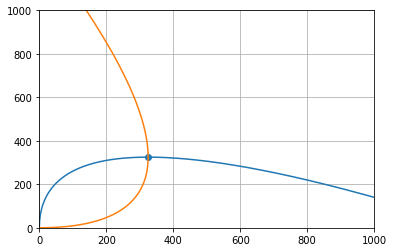

In [7]:
contest_plot()

Interactive widgets only visible on 'live' notebooks run on a notebook server.

In [8]:
interact(contest_plot, p=(0.5,1,0.1), ys=(50,150,10), r=(0.02,0.5,0.02));

interactive(children=(FloatSlider(value=1.0, description='p', max=1.0, min=0.5), IntSlider(value=130, description='ys', max=150, min=50, step=10), FloatSlider(value=0.1, description='r', max=0.5, min=0.02, step=0.02), Output()), _dom_classes=('widget-interact',))

In [9]:
interact(vA);

interactive(children=(FloatSlider(value=1.0, description='p', max=3.0, min=-1.0), IntSlider(value=130, description='ys', max=390, min=-130), IntSlider(value=150, description='ym', max=450, min=-150), FloatSlider(value=0.1, description='r', max=0.30000000000000004, min=-0.1), Output()), _dom_classes=('widget-interact',))

## Choice to mine or exploit with conflict.

If the incumbent choose to 'mine' then conflict is avoided. But this illustrates the error of interpreting the absence of conflict as an indicator of the absence of a property rights problem. The 'shadow of conflict' is what drove them toward mining.

TODO :  sections to still write

- defense/incursion require real inputs that must be drawn away from productive uses
- but conflict is not inherently destructive here.  Incumbent's lost property is property gained by the challenger, with no loss in the transfer. This could be modeled differently.
- Examine private vs social costs of conflict.  For this particular model we are led to the possibility of 'too little conflict' under some parameter constellations
- Explore comparative statics: what increases non-sustainable mining